In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
import os
import matplotlib.pyplot as plt

%run -i /Users/marie/Documents/Research/dataproc/tools/decont.py

## Using Francisco's code for decontamination in the first Population

In [3]:
clu1 = Table.read('Catalogues/NGC1027_7_Pop1.csv', format='csv')
# = pd.read_csv('Catalogues/NGC2539_8_Pop1.csv')
clu1

RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
41.20162834067,59.65690297015,464342520829593344,1.0068,0.066,4.342,-2.224,3.729,31,1.36,--,1.052,16.88032,17.795835,15.946208,1.849627,--,41.25680303396,41.2016479041,59.65688639523,1.039312
41.23232575133,59.70519449751,464342903081036416,1.0499,0.5364,4.949,-3.707,3.279,95,--,1.4512,1.091,19.948261,20.885586,18.634525,2.25106,--,41.29493244546,41.23235841183,59.70517992536,1.072682
41.46268285127,59.71044895929,464343693356691584,0.9441,0.8736,3.393,-1.366,3.106,95,--,1.3174,1.144,20.509865,21.45042,19.443134,2.007286,--,41.25358682973,41.46269488869,59.7104351568,0.98944
41.37402085686,59.78047712738,464344857292120448,1.0057,0.0784,3.355,-0.82,3.253,95,--,1.394,1.383,16.351807,16.780066,15.037567,1.742498,--,41.33559493293,41.37402810058,59.78046266765,1.03854
41.37410518627,59.78028462073,464344861591533184,0.9535,0.1107,3.986,-0.838,3.897,95,--,1.3367,1.062,17.125492,--,--,--,--,41.33540141847,41.37411258998,59.78026729959,0.996131
41.02425013491,59.74454401985,464350045612504448,0.8885,0.4244,3.553,-2.212,2.78,95,--,1.3103,1.009,19.822613,20.746143,18.8482,1.897944,--,41.37287248181,41.02426964795,59.74453166354,0.915419
40.87982500346,59.80939034922,464354104355638272,0.8627,0.1284,3.13,-1.562,2.712,95,--,1.3477,1.001,17.839539,--,--,--,--,41.46141182636,40.87983880788,59.80937829643,0.899597
41.13298622842,59.76604689752,464355818048611712,0.9461,0.1416,4.211,-3.188,2.751,31,1.34,--,1.187,17.974598,18.859318,16.830763,2.028555,--,41.37070025534,41.13301436943,59.7660346701,0.974596
41.24107677877,59.8420508626,464357128018102144,0.9056,0.1413,3.153,-1.656,2.684,31,1.306,--,1.005,18.11811,19.324657,17.040716,2.283941,--,41.41869654948,41.24109142625,59.84203893486,0.9344


In [5]:
input_file = 'Catalogues/NGC1027_7_Pop1.csv'
features = ['Gmag','BPmag-RPmag',"pmRA","pmDE"]
coordinates = ['RA_ICRS','DE_ICRS']
table = Table.read(input_file)

table = field_select(table,
                     cluster_center=(40.6770, 61.6160),
                     limiting_radii=[0, 0.6],
                     field_radii=[0.6],
                     coord_columns= coordinates,
                     footprint_geometry= "circle")

table = pert2d(table, features=features, cells=[1.5,0.75, 0.2, 0.2])


         data            area
cluster  (569, 4)        1.13097
field    (968, 4)        11.43369
 
feature     min     max     std    cell    ncells
Gmag         8.08   20.88   2.45   1.50      9
BPmag-RPmag        0.00    2.70   0.51   0.75      4
pmRA        -3.73    0.19   0.15   0.20     20
pmDE         0.10    4.09   0.16   0.20     20


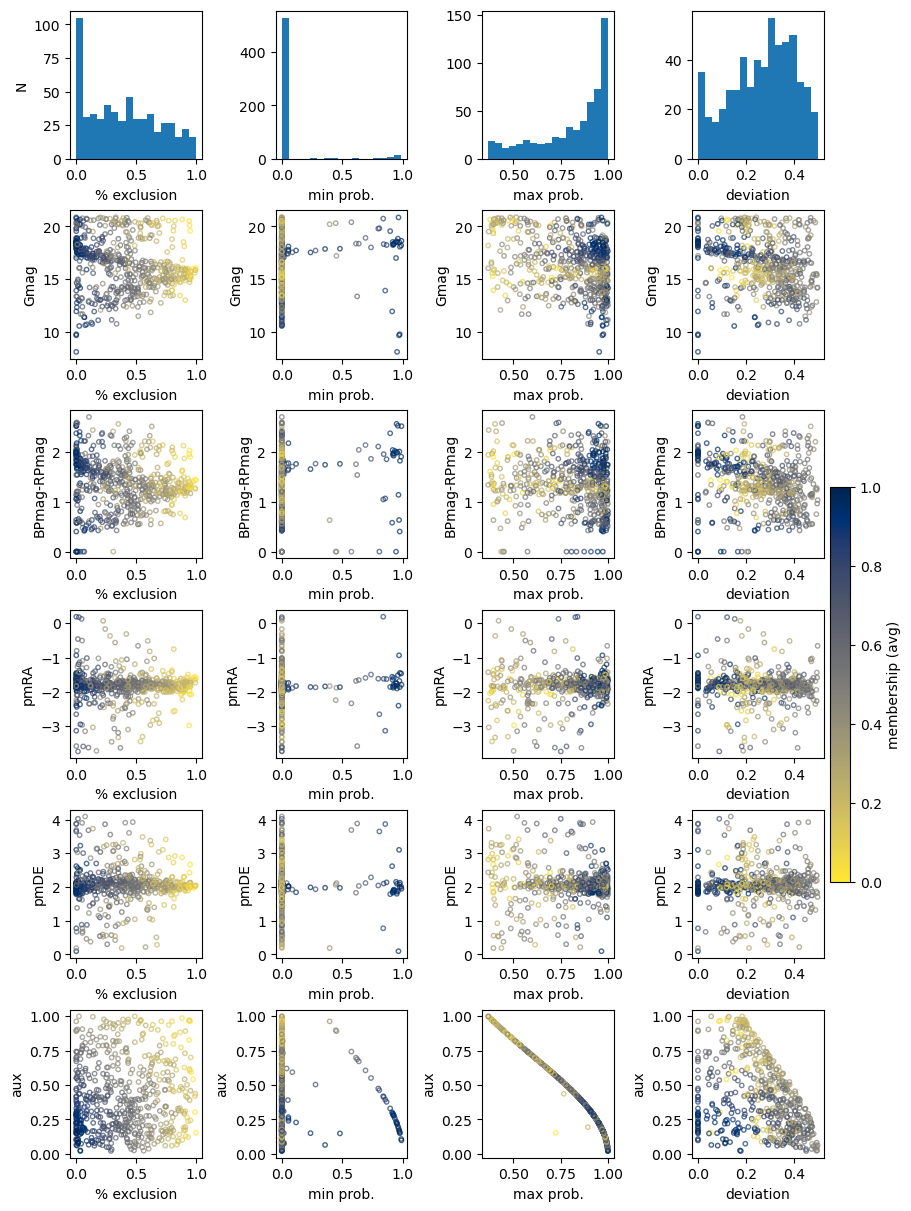

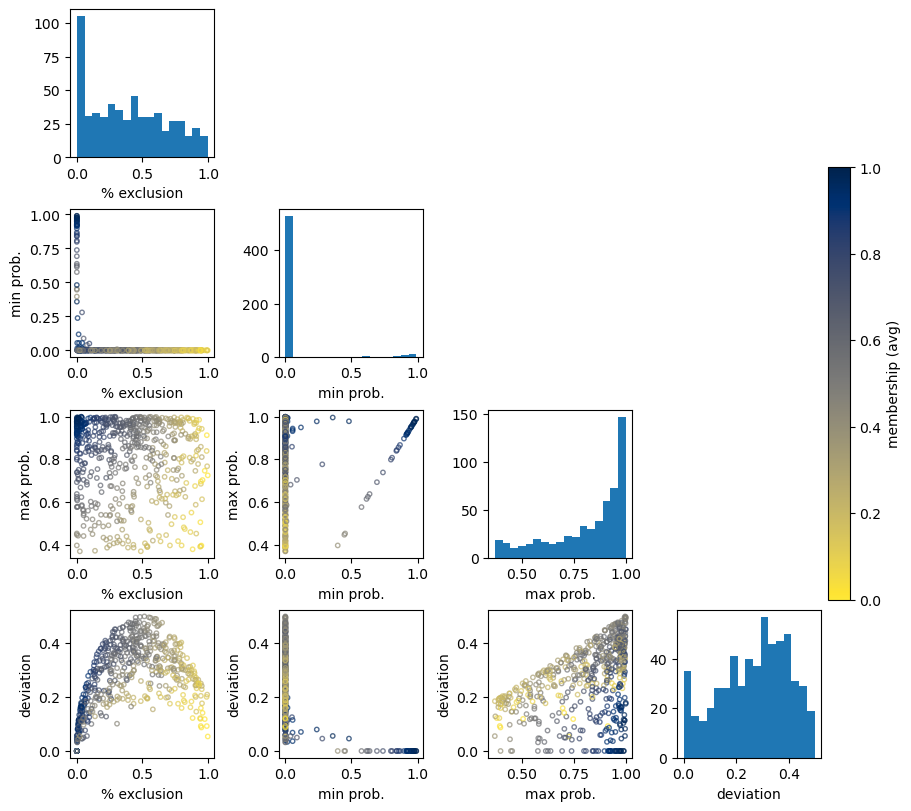

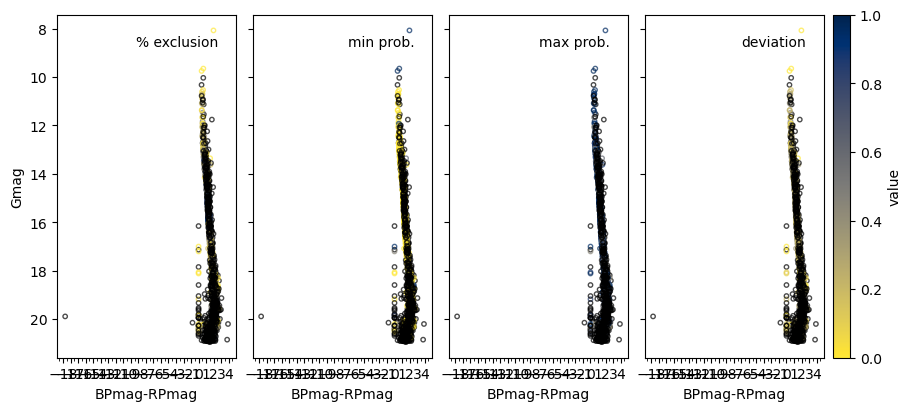

In [6]:
columns = ['excl','min','max','std']
labels = ['% exclusion', 'min prob.', 'max prob.', 'deviation']
plot_membership(table, columns, features+['aux'],
                labels=labels, color='avg', output='pert2d_ngc6242.pdf')

245


(<Figure size 700x300 with 4 Axes>,
 array([<Axes: xlabel='BPmag-RPmag', ylabel='Gmag'>,
        <Axes: xlabel='BPmag-RPmag'>, <Axes: xlabel='BPmag-RPmag'>],
       dtype=object))

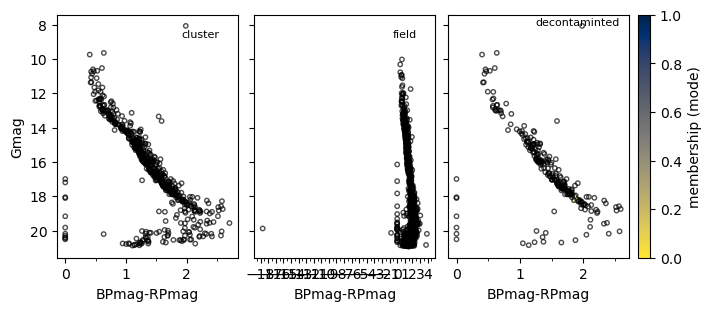

In [13]:
member = (table['excl'] <= 1) & (table['max'] > 0.7) & (table['std'] < 0.35)
print(np.sum(member))
plot_memb_cmd(table, ['Gmag','BPmag-RPmag'])

In [14]:
data1 = table[member]

In [15]:
#data1.write('Catalogues/NGC1027_9_Pop1.csv', format='csv', overwrite=True)

## Using Francisco's code for decontamination in the second Population

In [16]:
clu2 = Table.read('Catalogues/NGC1027_8_Pop2.csv', format='csv')
# = pd.read_csv('Catalogues/NGC2539_9_Pop2.csv')
clu2

RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
41.62395720754,59.70339857141,464340188661593472,0.8678,0.3916,2.502,-0.567,2.437,95,--,1.3269,1.001,19.7574,21.037899,18.698357,2.339542,--,41.21490658757,41.62396220119,59.70338774235,0.893857
41.52611010194,59.66330461091,464340390525839616,0.8485,0.278,3.447,-3.042,1.622,95,--,1.4102,0.991,19.291763,20.494804,18.243275,2.25153,--,41.19761762352,41.5261368697,59.663297401,0.8672770000000001
41.49327611737,59.79747350102,464344552348174336,0.8856,0.3377,3.142,-2.768,1.487,95,--,1.3082,1.071,19.456285,20.727522,18.367048,2.360474,--,41.32736123812,41.49330056971,59.79746689349,0.910681
40.98096751291,59.68804970284,464349289698115072,0.8867,0.2345,2.782,-1.835,2.091,95,--,1.289,0.987,19.12514,20.321392,18.140501,2.180891,--,41.32982061278,40.98098366759,59.68804040831,0.911681
41.0248322842,59.70160969721,464349637592001664,0.9095,0.8894,2.544,-1.885,1.709,95,--,1.3364,1.179,20.555613,21.21459,19.459024,1.755566,--,41.33340103382,41.02484888884,59.70160210302,0.955963
40.81977709172,59.64589119083,464350698447285888,0.8966,0.2876,2.4,-0.077,2.399,95,--,1.3136,1.025,19.583158,20.70769,18.598053,2.109636,--,41.32378062882,40.81977776827,59.6458805297,0.922111
40.71206465898,59.6859187386,464351493015822848,0.9805,0.3575,3.435,-0.026,3.435,95,--,1.2526,1.112,19.723509,21.452276,18.42984,3.022436,--,41.38227573487,40.71206488624,59.68590347355,1.008054
40.75709394049,59.68584703401,464351797959004160,0.8319,0.169,2.333,-1.754,1.538,95,--,1.2763,1.028,18.646336,20.062668,17.57839,2.484278,--,41.37308053813,40.75710938455,59.68584019924,0.8652989999999999
40.93301277629,59.8194441204,464354173077948032,0.8857,1.379,2.714,-0.496,2.669,95,--,1.5907,0.981,20.816998,21.284197,19.632175,1.652021,--,41.45989303267,40.93301715758,59.81943225941,0.911889


In [18]:
input_file = 'Catalogues/NGC1027_8_Pop2.csv'
features = ['Gmag','BPmag-RPmag',"pmRA","pmDE"]
coordinates = ['RA_ICRS','DE_ICRS']
table = Table.read(input_file)

table = field_select(table,
                     cluster_center=(40.6770, 61.6160),
                     limiting_radii=[0, 0.6],
                     field_radii=[0.6],
                     coord_columns= coordinates,
                     footprint_geometry= "circle")

table = pert2d(table, features=features, cells=[1.5,0.75, 0.2, 0.2])


         data            area
cluster  (364, 4)        1.13097
field    (2207, 4)        11.43133
 
feature     min     max     std    cell    ncells
Gmag         8.93   20.89   0.61   1.50      8
BPmag-RPmag        0.00    2.98   0.24   0.75      4
pmRA        -3.75    0.22   0.89   0.20     20
pmDE         0.09    4.07   0.65   0.20     20


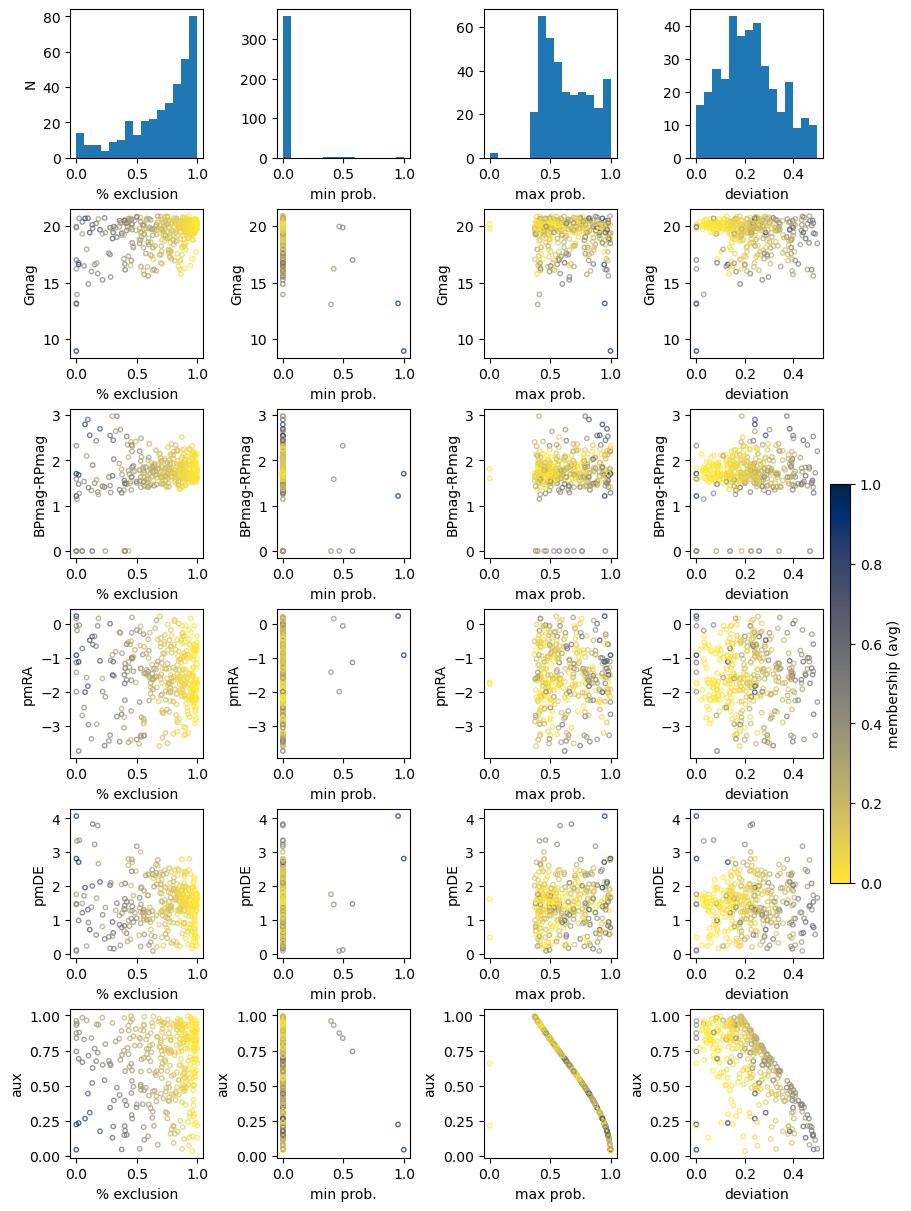

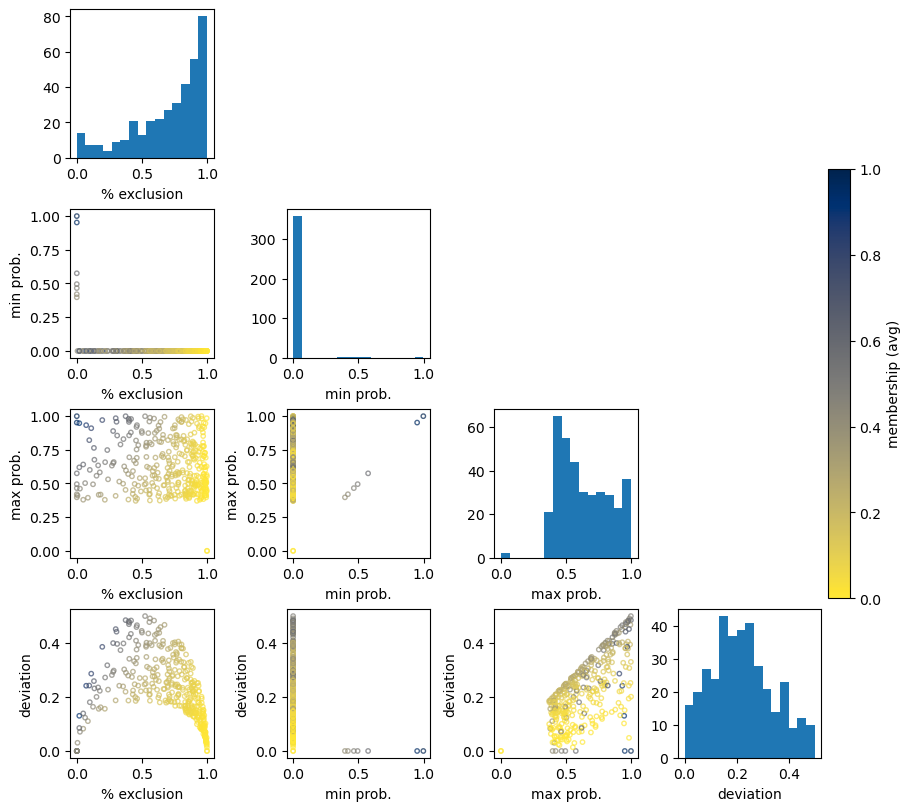

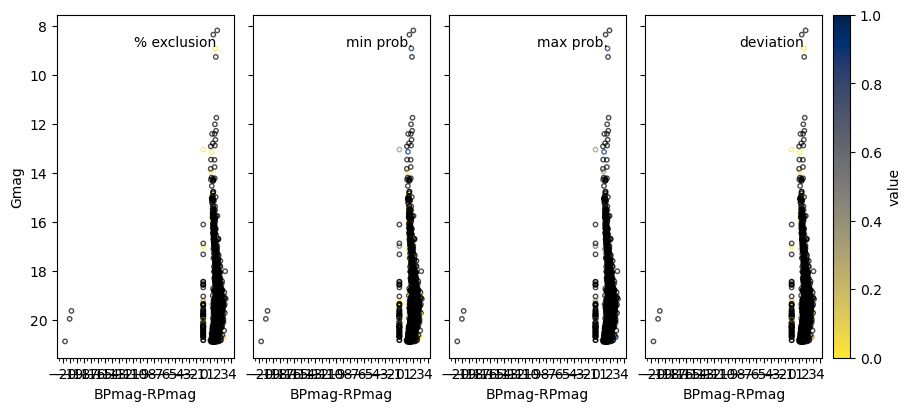

In [19]:
columns = ['excl','min','max','std']
labels = ['% exclusion', 'min prob.', 'max prob.', 'deviation']
plot_membership(table, columns, features+['aux'],
                labels=labels, color='avg', output='pert2d_ngc6242.pdf')

267


(<Figure size 700x300 with 4 Axes>,
 array([<Axes: xlabel='BPmag-RPmag', ylabel='Gmag'>,
        <Axes: xlabel='BPmag-RPmag'>, <Axes: xlabel='BPmag-RPmag'>],
       dtype=object))

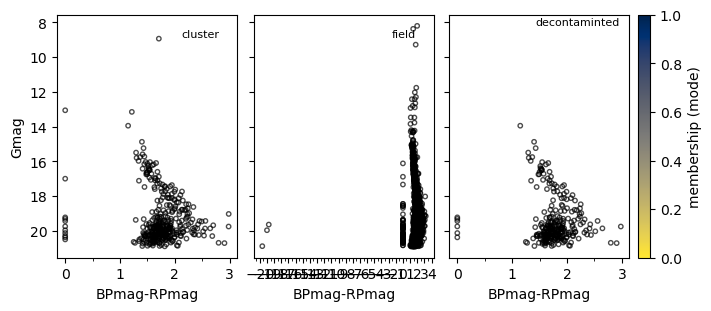

In [22]:
member = (table['excl'] < 1.0) & (table['min'] < 0.3) & (table['std'] < 0.3)
print(np.sum(member))
plot_memb_cmd(table, ['Gmag','BPmag-RPmag'])